In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
cat = Table(fitsio.read('/global/project/projectdirs/desi/target/analysis/truth/parent/DR16Q_v4.fits'))
print(len(cat))

750414


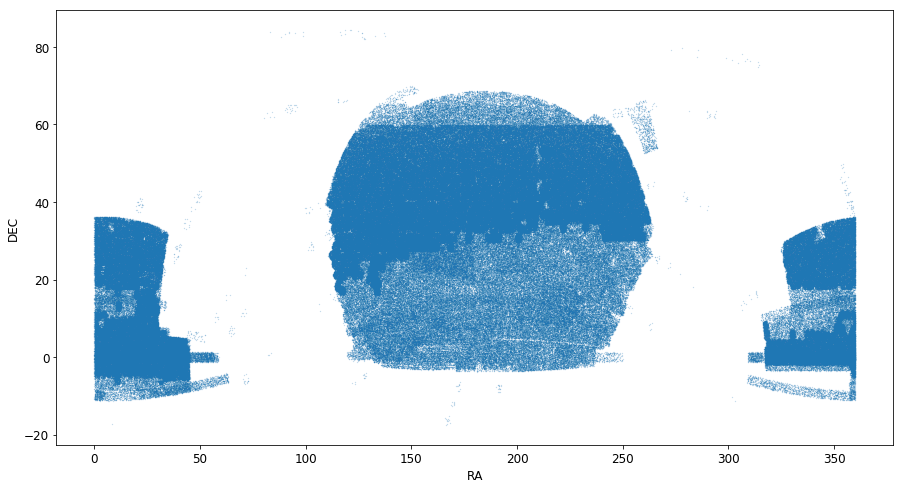

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(cat['RA'], cat['DEC'], '.', markersize=0.4, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

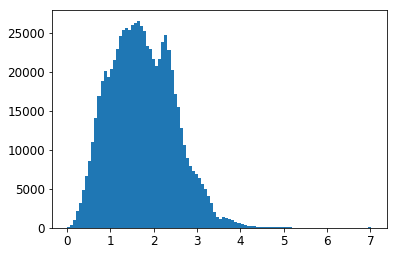

In [14]:
mask = cat['Z']!=-999
plt.hist(cat['Z'][mask], 100);

In [10]:
t = Table()
t['type'], t['count'] = np.unique(cat['SOURCE_Z'], return_counts=True)
t['frac (%)'] = t['count']/len(cat)*100
# t['type'], t['count'] = np.unique(cat['TYPE'][mask], return_counts=True)
# t['frac (%)'] = t['count']/np.sum(mask)*100
t['frac (%)'].format = '%.1f'
t.sort('count')
t

type,count,frac (%)
bytes12,int64,float64
DR12QV,18,0.0
DR7QV_SCH,11127,1.5
DR6Q_HW,63143,8.4
VI,319596,42.6
PIPE,356530,47.5


In [11]:
mask = cat['ZWARNING']==-1
cat[mask]

SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_LYAWG,Z_DLA [5],NHI_DLA [5],CONF_DLA [5],BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,PLATE_DUPLICATE [74],MJD_DUPLICATE [74],FIBERID_DUPLICATE [74],SPECTRO_DUPLICATE [74],SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,PSFFLUX [5],PSFFLUX_IVAR [5],PSFMAG [5],PSFMAGERR [5],EXTINCTION [5],M_I,SN_MEDIAN_ALL,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,W1_FLUX,W1_FLUX_IVAR,W1_MAG,W1_MAG_ERR,W1_CHI2,W1_FLUX_SNR,W1_SRC_FRAC,W1_EXT_FLUX,W1_EXT_FRAC,W1_NPIX,W2_FLUX,W2_FLUX_IVAR,W2_MAG,W2_MAG_ERR,W2_CHI2,W2_FLUX_SNR,W2_SRC_FRAC,W2_EXT_FLUX,W2_EXT_FRAC,W2_NPIX,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,JMAG,JMAG_ERR,JSNR,JRDFLAG,HMAG,HMAG_ERR,HSNR,HRDFLAG,KMAG,KMAG_ERR,KSNR,KRDFLAG,SDSS2MASS_SEP,2RXS_ID,2RXS_RA,2RXS_DEC,2RXS_SRC_FLUX,2RXS_SRC_FLUX_ERR,SDSS2ROSAT_SEP,XMM_SRC_ID,XMM_RA,XMM_DEC,XMM_SOFT_FLUX,XMM_SOFT_FLUX_ERR,XMM_HARD_FLUX,XMM_HARD_FLUX_ERR,XMM_TOTAL_FLUX,XMM_TOTAL_FLUX_ERR,XMM_TOTAL_LUM,SDSS2XMM_SEP,GAIA_MATCHED,GAIA_DESIGNATION,GAIA_RA,GAIA_DEC,GAIA_PARALLAX,GAIA_PARALLAX_ERR,GAIA_PM_RA,GAIA_PM_RA_ERR,GAIA_PM_DEC,GAIA_PM_DEC_ERR,GAIA_G_MAG,GAIA_G_FLUX_SNR,GAIA_BP_MAG,GAIA_BP_FLUX_SNR,GAIA_RP_MAG,GAIA_RP_FLUX_SNR,SDSS2GAIA_SEP
bytes18,float64,float64,int32,int32,int16,bytes6,bytes6,int16,float64,int16,float64,int16,int16,int16,int64,float64,int16,int16,float64,int16,float64,int16,float64,float64,int16,float64,bytes12,float64,int32,bytes19,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32,int32,int16,int16,uint8,int32,bytes3,int32,int32,int32,float64,float64,float64,float64,bytes14,int32,float64,float32,float64,float32,float64,float32,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,float64,float64,float64,int32,float64,bytes21,float64,float64,float32,float32,float64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,int16,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
000006.53+003055.2,0.027228,0.515341,685,52203,467,UNK,UNK,-1,-1.0,0,-1.0,-1,-1,-1,107732142,-1.0,-1,0,-1.0,-1,1.8246,1,1.823154,1.82382595539,1,1.823154,DR6Q_HW,-1.0,-1,1237663277927760239,1.82259176187,0,1286.2396375,-1.0,7682,0.0,-1.0,7682,0.0,1.81876405032,0,33.4882321192,1.81735078891,0,41.7503098561,1.81749080022,0,251.595381924,-1.0,7682,0.0,1.82259,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,-1,-1,-1,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,-1 .. -1,2,4145,301,5,110,367,5000.0,0.0,-25.6587562561,116.197746277,chunk22,489,15.9036998749,5.87938 .. 8.31947,13.3217058182 .. 1.57178151608,20.5761 .. 20.1913,0.05053835

In [5]:
t = Table()
t['type'], t['count'] = np.unique(cat['ZWARNING'], return_counts=True)
t['frac (%)'] = t['count']/len(cat)*100
# t['type'], t['count'] = np.unique(cat['TYPE'][mask], return_counts=True)
# t['frac (%)'] = t['count']/np.sum(mask)*100
t['frac (%)'].format = '%.1f'
t.sort('count')
t

type,count,frac (%)
int32,int64,float64
68,1715,0.2
64,5269,0.7
4,32083,4.3
-1,73325,9.8
0,638022,85.0


In [9]:
cat.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'PLATE',
 'MJD',
 'FIBERID',
 'AUTOCLASS_PQN',
 'AUTOCLASS_DR14Q',
 'IS_QSO_QN',
 'Z_QN',
 'RANDOM_SELECT',
 'Z_10K',
 'Z_CONF_10K',
 'PIPE_CORR_10K',
 'IS_QSO_10K',
 'THING_ID',
 'Z_VI',
 'Z_CONF',
 'CLASS_PERSON',
 'Z_DR12Q',
 'IS_QSO_DR12Q',
 'Z_DR7Q_SCH',
 'IS_QSO_DR7Q',
 'Z_DR6Q_HW',
 'Z_DR7Q_HW',
 'IS_QSO_FINAL',
 'Z',
 'SOURCE_Z',
 'Z_PIPE',
 'ZWARNING',
 'OBJID',
 'Z_PCA',
 'ZWARN_PCA',
 'DELTACHI2_PCA',
 'Z_HALPHA',
 'ZWARN_HALPHA',
 'DELTACHI2_HALPHA',
 'Z_HBETA',
 'ZWARN_HBETA',
 'DELTACHI2_HBETA',
 'Z_MGII',
 'ZWARN_MGII',
 'DELTACHI2_MGII',
 'Z_CIII',
 'ZWARN_CIII',
 'DELTACHI2_CIII',
 'Z_CIV',
 'ZWARN_CIV',
 'DELTACHI2_CIV',
 'Z_LYA',
 'ZWARN_LYA',
 'DELTACHI2_LYA',
 'Z_LYAWG',
 'Z_DLA',
 'NHI_DLA',
 'CONF_DLA',
 'BAL_PROB',
 'BI_CIV',
 'ERR_BI_CIV',
 'AI_CIV',
 'ERR_AI_CIV',
 'BI_SIIV',
 'ERR_BI_SIIV',
 'AI_SIIV',
 'ERR_AI_SIIV',
 'BOSS_TARGET1',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2'

In [11]:
cat[:5]

SDSS_NAME,RA,DEC,PLATE,MJD,FIBERID,AUTOCLASS_PQN,AUTOCLASS_DR14Q,IS_QSO_QN,Z_QN,RANDOM_SELECT,Z_10K,Z_CONF_10K,PIPE_CORR_10K,IS_QSO_10K,PRIM_REC,THING_ID,Z_VI,Z_CONF,CLASS_PERSON,Z_DR12Q,IS_QSO_DR12Q,Z_DR7Q_SCH,IS_QSO_DR7Q,Z_DR6Q_HW,Z_DR7Q_HW,IS_QSO_FINAL,Z,SOURCE_Z,Z_PIPE,ZWARNING,OBJID,Z_PCA,ZWARN_PCA,DELTACHI2_PCA,Z_HALPHA,ZWARN_HALPHA,DELTACHI2_HALPHA,Z_HBETA,ZWARN_HBETA,DELTACHI2_HBETA,Z_MGII,ZWARN_MGII,DELTACHI2_MGII,Z_CIII,ZWARN_CIII,DELTACHI2_CIII,Z_CIV,ZWARN_CIV,DELTACHI2_CIV,Z_LYA,ZWARN_LYA,DELTACHI2_LYA,Z_DLA [5],NHI_DLA [5],CONF_DLA [5],BAL_PROB,BI_CIV,ERR_BI_CIV,AI_CIV,ERR_AI_CIV,BI_SIIV,ERR_BI_SIIV,AI_SIIV,ERR_AI_SIIV,BOSS_TARGET1,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,NSPEC_SDSS,NSPEC_BOSS,NSPEC,PLATE_DUPLICATE [74],MJD_DUPLICATE [74],FIBERID_DUPLICATE [74],SPECTRO_DUPLICATE [74],SKYVERSION,RUN_NUMBER,RERUN_NUMBER,CAMCOL_NUMBER,FIELD_NUMBER,ID_NUMBER,LAMBDA_EFF,ZOFFSET,XFOCAL,YFOCAL,CHUNK,TILE,PLATESN2,PSFFLUX [5],PSFFLUX_IVAR [5],PSFMAG [5],PSFMAGERR [5],EXTINCTION [5],SN_MEDIAN_ALL
bytes18,float64,float64,int32,int32,int16,bytes6,bytes6,int16,float64,int16,float64,int16,int16,int16,int16,int64,float64,int16,int16,float64,int16,float64,int16,float64,float64,int16,float64,bytes12,float64,int32,bytes19,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32,int32,int16,int16,uint8,int32,bytes3,int32,int32,int32,float64,float64,float64,float64,bytes14,int32,float64,float32,float64,float32,float64,float32,float64
000000.04+064602.3,0.000186656796416,6.76732079016,11279,58449,85,STAR,STAR,0,2.02985595048,0,-1.0,-1,-1,-1,0,171139738,-1.0,0,0,-1.0,0,-1.0,-1,-1.0,-1.0,0,-0.000722127151676,PIPE,-0.000722127151676,0,1237669516904956169,-0.00103853840625,0,1132.98309646,-0.00653286983772,0,20.7078245136,0.00642469482052,0,19.3257146548,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,2048,0,0,0,0,0,-1,0 .. 0,0 .. 0,0 .. 0,0 .. 0,2,5598,301,2,115,265,4000.0,0.0,223.01914978,-30.6508789062,eboss26,17451,15.2288999557,2.28615 .. 16.2559,17.657251358 .. 2.09826850891,21.5982 .. 19.4702,0.112182237208 .. 0.0459186583757,0.22029 .. 0.065635,8.4100446701
000000.04+064602.3,0.000186656796416,6.76732079016,8740,57367,666,STAR,STAR,0,2.05205492996,0,-1.0,-1,-1,-1,1,171139738,-1.0,0,0,-1.0,0,-1.0,-1,-1.0,-1.0,0,-0.000684932165314,PIPE,-0.000684932165314,0,1237669516904956169,-0.00126028035553,0,1061.7727171,-0.0130027117411,0,20.0927065378,-0.00453977579773,0,45.0787366891,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,2048,0,0,0,0,0,-1,0 .. 0,0 .. 0,0 .. 0,0 .. 0,2,5598,301,2,115,265,4000.0,0.0,-80.4229888916,210.676452637,eboss9,16078,18.602399826,2.28615 .. 16.2559,17.657251358 .. 2.09826850891,21.5982 .. 19.4702,0.112182237208 .. 0.0459186583757,0.22029 .. 0.065635,10.4988641739
000000.05+272811.6,0.000214810196439,27.4699033305,7695,57654,574,STAR,STAR,0,2.12061894635,0,-1.0,-1,-1,-1,1,349500180,-1.0,0,0,-1.0,0,-1.0,-1,-1.0,-1.0,0,-0.000839488173369,PIPE,-0.000839488173369,0,1237663233379074508,-0.000694120794585,0,71.9163786405,-0.00832472031419,0,20.500704129,-0.011810769608,0,25.3091472969,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,-1.0,7682,0.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0 .. -1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,2048,0,0,0,0,0,-1,0 .. 0,0 .. 0,0 .. 0,0 .. 0,2,4135,301,2,287,460,4000.0,0.0,-216.421600342,21.2004146576,eboss1,16242,12.4032001495,1.97577 .. 6.43163,21.5766868591 .. 2.03631472588,21.7553 .. 20.4651,0.117132760584 .. 0.115286014974,0.252462 .. 0.0752203,4.09367513657
000000.06-021415.2,0.000279409317358,-2.23756411341,

In [7]:
sys.path.append(os.path.expanduser('~/git/Python/user_modules/'))
import match_coord

4 objects with a nearby neighbor


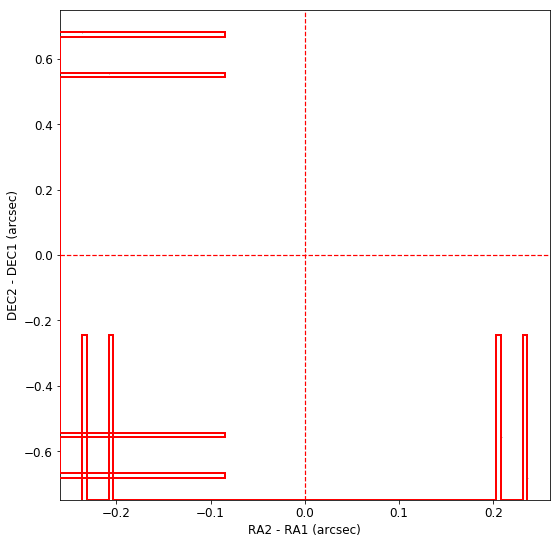

4 0.00%


In [8]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['DEC'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))